In [1]:
%pip install pydot
%pip install networkx 
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: graphviz in c:\users\farha\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (0.20.3)



You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define features and target variable
X = dataset.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = dataset['target']  # Replace 'target' with your actual target column name

#drop all columns with missing values
X = X.dropna(axis=1)

def fit_model(dataset, target, test_size, random_state_value, hidden_layer_sizes, activation,batch_size, learning_rate, learning_rate_init, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=test_size, random_state=random_state_value)

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        batch_size=batch_size,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=random_state_value,
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return y_test, y_pred

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Ensure all six values are being returned
    return accuracy, precision, recall, f1, conf_matrix, class_report

### Best Activation Function

In [26]:
import tqdm

results = {}
# deduce best activation function
for activation_function in tqdm.tqdm(['identity', 'logistic', 'tanh', 'relu']):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (50, 50), activation_function, 100, 'constant', 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[activation_function] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


,accuracy
logistic,0.883598
relu,0.772487
tanh,0.764550
identity,0.587302


### Best Batch Size

In [27]:
import tqdm

results = {}

# generate batch sizes
batch_sizes = [10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, "auto"]
for batch_size in tqdm.tqdm(batch_sizes):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', batch_size, 'constant', 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[batch_size] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

100%|██████████| 12/12 [01:12<00:00,  6.04s/it]


,accuracy
200,0.923280
auto,0.923280
400,0.917989
800,0.907407
80,0.888889
40,0.886243
100,0.883598
1000,0.878307
60,0.873016
600,0.857143


### Best Learning Rate

In [29]:
import tqdm

results = {}

for learning_rate in tqdm.tqdm(['constant', 'invscaling', 'adaptive']):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', 200, learning_rate, 0.001, 1000)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[learning_rate] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

100%|██████████| 3/3 [00:29<00:00,  9.87s/it]


,accuracy
constant,0.92328
invscaling,0.92328
adaptive,0.92328


### Best Number of Epoch

In [30]:
import tqdm

results = {}

# generate batch sizes
for number_of_epoch in tqdm.tqdm(range(50, 2000, 50)):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', batch_size, 'constant', 0.001, number_of_epoch)
    accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)
    results[number_of_epoch] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

  0%|          | 0/39 [00:00<?, ?it/s]C:\Users\farha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
  3%|▎         | 1/39 [00:00<00:30,  1.24it/s]C:\Users\farha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
  5%|▌         | 2/39 [00:02<00:43,  1.18s/it]C:\Users\farha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochast

,accuracy
650,0.939153
1000,0.923280
1050,0.923280
1150,0.923280
1200,0.923280
1250,0.923280
1300,0.923280
1350,0.923280
1400,0.923280
1450,0.923280


### Best Hidden Layer Configuration

In [15]:
import tqdm

results = {}

for number_of_hidden_layers in tqdm.tqdm(range(1, 10)):
    for number_of_neurons in range(10, 100, 10):
        layer_sizes = tuple([number_of_neurons] * number_of_hidden_layers)
        y_test, y_pred = fit_model(X, y, 0.2, 8, layer_sizes, 'logistic', batch_size, 'constant', 0.001, 1000)
        accuracy = evaluate_model(y_test, y_pred)
        results[str(number_of_hidden_layers) + "x" + str(number_of_neurons)] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\farha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
 11%|█         | 1/9 [00:23<03:09, 23.74s/it]

### Training Best Model

In [23]:
# Train the model with the best configuration
y_test_best, y_pred_best = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', 200, 'constant', 0.001, 1000)

# Evaluate the model
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test_best, y_pred_best)

In [24]:

def display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix):
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
   
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Call the function to print the metrics
display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix)

Accuracy: 0.9233
Precision: 0.9239
Recall: 0.9233
F1-Score: 0.9233
Specificity: 0.9053

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       190
           1       0.91      0.94      0.92       188

    accuracy                           0.92       378
   macro avg       0.92      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378


Confusion Matrix:
[[172  18]
 [ 11 177]]


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Visualization with subplots

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Two subplots: confusion matrix and precision/recall/F1-score

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix')

# Plot Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']  # Different colors for each bar

sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)
axs[1].set_ylim(0, 1)
axs[1].set_title('Accuracy, Precision, Recall, and F1-Score')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


ModuleNotFoundError: No module named 'seaborn'

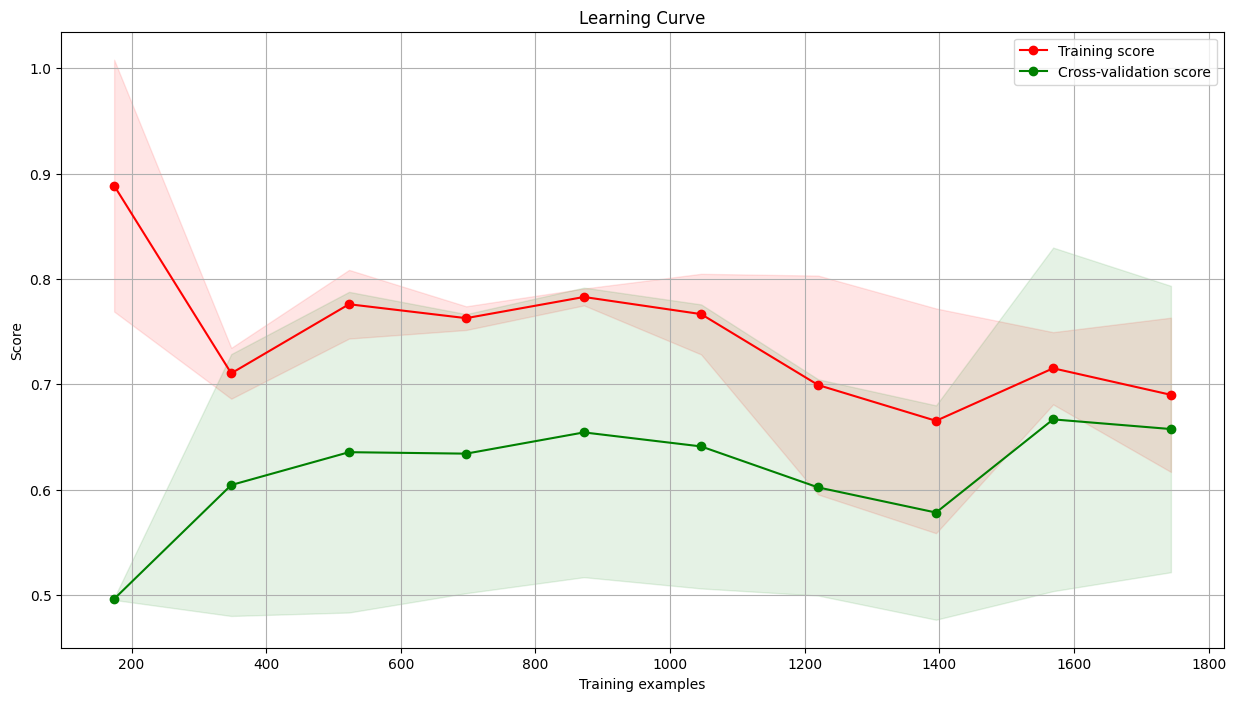

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_imputed, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(15, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [8]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances by their importance
sorted_idx = perm_importance.importances_mean.argsort()

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

# Plot feature importances with different colors for each bar
plt.figure(figsize=(15, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color=colors)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.show()


NameError: name 'model' is not defined